/mnt/batch/tasks/shared/LS_root/mounts/clusters/b001-dl/code/Users/5b001/DL3_20241006/ch03


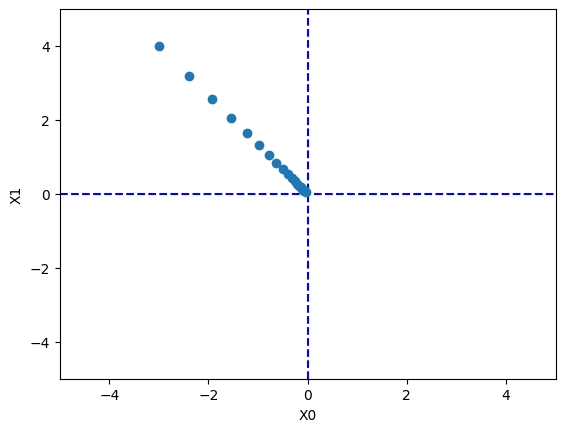

In [1]:
# coding: utf-8
# coding: utf-8
import os, sys
print(os.getcwd())

import numpy as np
import matplotlib.pylab as plt

# 수치미분을 계산하는 함수
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val  # 값 복원

    return grad

# 변수가 1개일 때의 수치 미분 수행
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        # 변수가 2개 이상일 때의 수치 미분 수행
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

# 수치미분으로 구한 기울기를 이용해 중심으로 이동
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

# 미분 전 원래 함수
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

# 기울기값을 이용해 중심으로 이동시키는 함수 호출
plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()
